In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_cars=pd.read_csv("cleaned_data.csv")

In [3]:
pd.options.display.float_format = "{:.3f}".format

In [4]:
top_ten=df_cars["make"].value_counts()[0:10]

In [5]:
t_ten_make=pd.DataFrame(top_ten).reset_index()["make"]

In [6]:
g=df_cars.groupby("make")[["vehicle_age","sellingprice"]]

In [7]:
df_cars["proxy_profit"]=df_cars["sellingprice"]-df_cars["mmr"]

In [8]:
df_cars["proxy_profit_percent"]=df_cars["proxy_profit"]/df_cars["mmr"]*100

In [9]:
df_cars["proxy_profit_percent"]

0         -5.956
1          0.909
2          1.515
3         -5.797
4        -17.647
           ...  
558593    -6.516
558594     1.987
558595    14.094
558596   -26.490
558597    -9.797
Name: proxy_profit_percent, Length: 558598, dtype: float64

In [10]:
df_mixed=df_cars.groupby(["state", "make"],as_index=False)[["mmr","proxy_profit", "proxy_profit_percent","vehicle_age","odometer"]].mean()

In [11]:
plot_df_profits = (
    df_cars
    .groupby(["make", "vehicle_age"], as_index=False)["proxy_profit_percent"]
    .mean()
)

In [12]:
plot_df_profits_filtered = plot_df_profits[plot_df_profits["make"].isin(t_ten_make)]

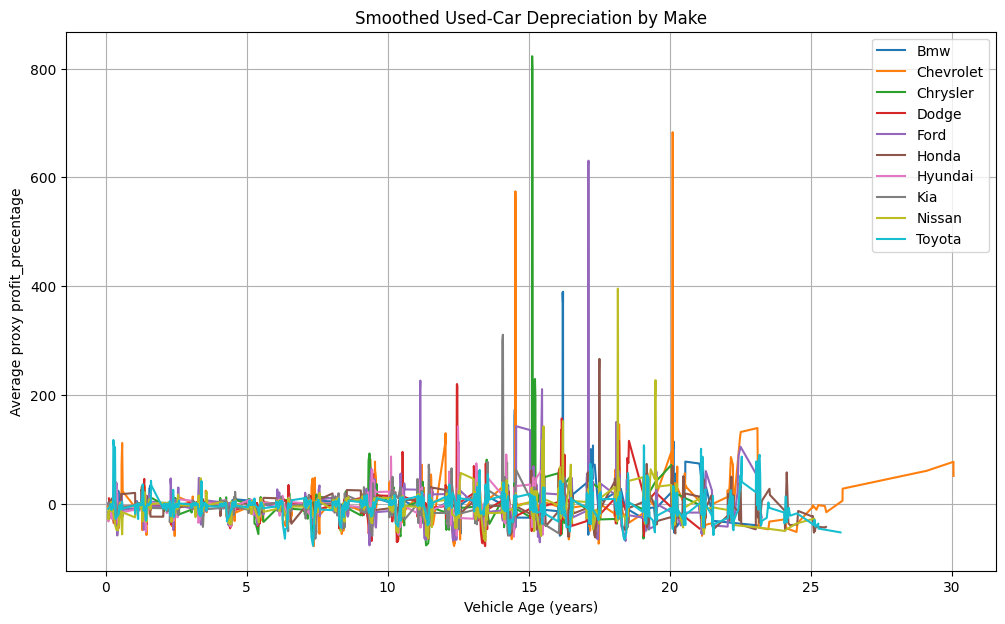

In [13]:
window = 3

plt.figure(figsize=(12, 7))

for make, grp in plot_df_profits_filtered.groupby("make"):
    grp = grp.sort_values("vehicle_age")
    smoothed = grp["proxy_profit_percent"].rolling(window=window, center=True).mean()

    plt.plot(grp["vehicle_age"], smoothed, label=make)

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average proxy profit_precentage")
plt.title("Smoothed Used-Car Depreciation by Make")
plt.legend()
plt.grid(True)
plt.show()

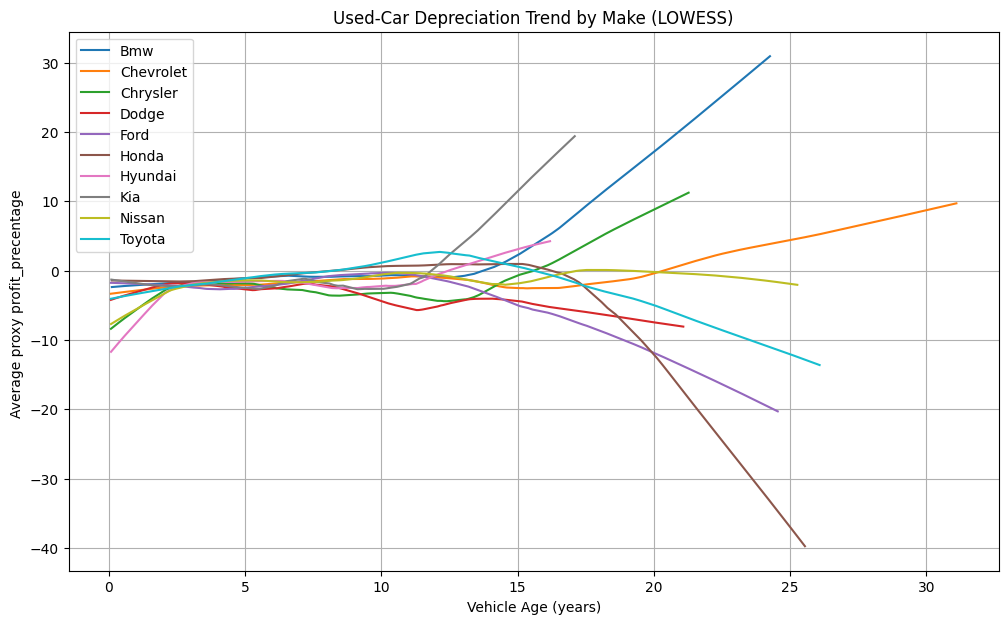

In [14]:
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(12, 7))

for make, grp in plot_df_profits_filtered.groupby("make"):
    grp = grp.sort_values("vehicle_age")
    smoothed = lowess(
        grp["proxy_profit_percent"],
        grp["vehicle_age"],
        frac=0.3  
    )

    plt.plot(smoothed[:, 0], smoothed[:, 1], label=make)

plt.xlabel("Vehicle Age (years)")
plt.ylabel("Average proxy profit_precentage ")
plt.title("Used-Car Depreciation Trend by Make (LOWESS)")
plt.legend()
plt.grid(True)
plt.show()